<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/Costarican.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/Costarican_train.csv')

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/Costarican_test.csv')

In [ ]:
train = train.drop(['Id'], axis=1)
test = test.drop(['Id'], axis=1)

In [ ]:
test = test.drop(['v2a1'], axis=1)
test = test.drop(['rez_esc'], axis=1)
test = test.drop(['v18q1'], axis=1)

In [ ]:
print(f'train shape:{train.shape}, test shape:{test.shape}')

train shape:(9557, 143), test shape:(23856, 142)


In [ ]:
def missing_data(data):
  d_sum = data.isnull().sum()
  d_percent = round(data.isnull().sum()/len(data)*100, 2)

  d_table = pd.concat([d_sum, d_percent], axis=1, keys=['Sum', 'Percent']).sort_values(by='Percent', ascending=False).head(10)
  return d_table

In [ ]:
missing_data(train)

,Sum,Percent
hacdor,0,0.0
hogar_total,0,0.0
parentesco11,0,0.0
parentesco12,0,0.0
idhogar,0,0.0
hogar_nin,0,0.0
hogar_adul,0,0.0
hogar_mayor,0,0.0
dependency,0,0.0
instlevel5,0,0.0


In [ ]:
missing_data(test)

,Sum,Percent
hacdor,0,0.0
hogar_mayor,0,0.0
parentesco10,0,0.0
parentesco11,0,0.0
parentesco12,0,0.0
idhogar,0,0.0
hogar_nin,0,0.0
hogar_adul,0,0.0
hogar_total,0,0.0
instlevel4,0,0.0


In [ ]:
missing_data(data)

,Sum,Percent
Target,23856,71.4
hogar_total,0,0.0
parentesco11,0,0.0
parentesco12,0,0.0
idhogar,0,0.0
hogar_nin,0,0.0
hogar_adul,0,0.0
hogar_mayor,0,0.0
dependency,0,0.0
instlevel5,0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
train.select_dtypes('object').columns

Index(['idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [ ]:
data = pd.concat([train, test])

In [ ]:
data_target = data['Target']

In [ ]:
for i in data.select_dtypes('object').columns:
  lencoders=LabelEncoder()
  data[i] = lencoders.fit_transform(data[i])

In [ ]:
data = data.drop(['rez_esc', 'v18q1', 'v2a1'], axis=1)

In [ ]:
data['SQBmeaned'] = data['SQBmeaned'].fillna(data['SQBmeaned'].median())
data['meaneduc'] = data['meaneduc'].fillna(data['meaneduc'].median())

In [ ]:
train = data[data.Target.notnull()]
test = data[data.Target.isnull()]
test = test.drop(['Target'], axis=1)

In [ ]:
test.shape

(23856, 138)

In [ ]:
print(f'train shape:{train.shape}, test shape:{test.shape}')

train shape:(9557, 139), test shape:(23856, 138)


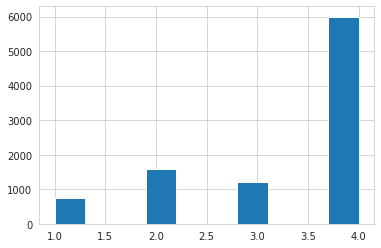

In [ ]:
train['Target'].hist()

In [ ]:
X = train.drop(['Target'], axis=1)
Y = train['Target']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=100, n_jobs=-1)
X_resampled, Y_resampled = smote.fit_resample(X,Y)

In [ ]:
print(X_resampled.shape, Y_resampled.shape)

(23984, 138) (23984,)


In [ ]:
train.shape

(9557, 139)

In [ ]:
train_x = pd.DataFrame(X_resampled, columns=X.columns)
train_y = pd.Series(Y_resampled, name='Target')

In [ ]:
train = pd.concat([train_x, train_y], axis=1)

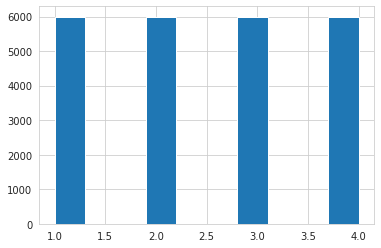

In [ ]:
train.Target.hist()

In [ ]:
train.shape

(23984, 139)

In [ ]:
x = train.drop(['Target'], axis=1)
y = train['Target']

In [ ]:
from sklearn.preprocessing import robust_scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, log_loss
from keras.utils import to_categorical
import xgboost as xgb
import lightgbm as lgbm
from sklearn.svm import SVC

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=1234, stratify=y)

accuracy: 0.9518012008005337
cohen_kappa_score: 0.9357349344007115
              precision    recall  f1-score   support

         1.0       0.96      0.97      0.97      1499
         2.0       0.96      0.91      0.94      1499
         3.0       0.94      0.94      0.94      1499
         4.0       0.94      0.98      0.96      1499

    accuracy                           0.95      5996
   macro avg       0.95      0.95      0.95      5996
weighted avg       0.95      0.95      0.95      5996



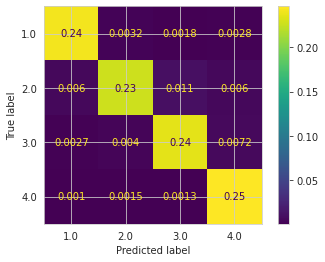

In [ ]:
model_rf = RandomForestClassifier(n_jobs=-1)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_rf))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(model_rf, x_test, y_test, normalize='all')

accuracy: 0.7159773182121414
cohen_kappa_score: 0.6213030909495219
              precision    recall  f1-score   support

         1.0       0.73      0.79      0.76      1499
         2.0       0.68      0.48      0.56      1499
         3.0       0.68      0.68      0.68      1499
         4.0       0.75      0.91      0.83      1499

    accuracy                           0.72      5996
   macro avg       0.71      0.72      0.71      5996
weighted avg       0.71      0.72      0.71      5996



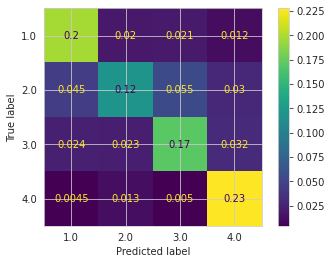

In [ ]:
model_xgb = xgb.XGBClassifier(n_jobs=-1)
model_xgb.fit(x_train, y_train)
y_pred_xgb = model_xgb.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_xgb))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
plot_confusion_matrix(model_xgb, x_test, y_test, normalize='all')

accuracy: 0.909606404269513
cohen_kappa_score: 0.879475205692684
              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94      1499
         2.0       0.92      0.84      0.88      1499
         3.0       0.90      0.91      0.90      1499
         4.0       0.88      0.96      0.91      1499

    accuracy                           0.91      5996
   macro avg       0.91      0.91      0.91      5996
weighted avg       0.91      0.91      0.91      5996



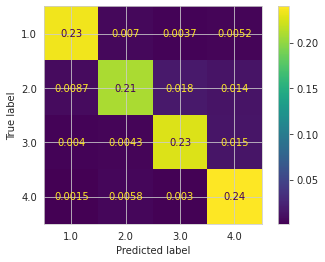

In [ ]:
model_lgbm = lgbm.LGBMClassifier()
model_lgbm.fit(x_train, y_train)
y_pred_lgbm = model_lgbm.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_lgbm))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))
plot_confusion_matrix(model_lgbm, x_test, y_test, normalize='all')

accuracy: 0.35440293529019345
cohen_kappa_score: 0.13920391372025798
              precision    recall  f1-score   support

         1.0       0.34      0.38      0.36      1499
         2.0       0.30      0.34      0.32      1499
         3.0       0.31      0.36      0.33      1499
         4.0       0.60      0.34      0.44      1499

    accuracy                           0.35      5996
   macro avg       0.39      0.35      0.36      5996
weighted avg       0.39      0.35      0.36      5996



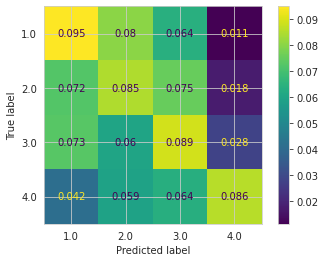

In [ ]:
model_svm = SVC(kernel='rbf')
model_svm.fit(x_train, y_train)
y_pred_svm = model_svm.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_svm))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
plot_confusion_matrix(model_svm, x_test, y_test, normalize='all')

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
ids=test['Id']
test.drop(['Id'], axis=1, inplace=True)

In [ ]:
kfold = 5
kf = StratifiedKFold(n_splits=kfold, shuffle=True)

predicts_result = []
for train_index, test_index in kf.split(x_train, y_train):
    print("###")
    X_train, X_val = x_train.iloc[train_index], x_train.iloc[test_index]
    Y_train, Y_val = y_train.iloc[train_index], y_train.iloc[test_index]
    model_lgbm.fit(X_train, Y_train, eval_set=[(X_val, Y_val)], 
            early_stopping_rounds=400, verbose=100)
    predicts_result.append(model_lgbm.predict(test))

###
Training until validation scores don't improve for 400 rounds.
[100]	valid_0's multi_logloss: 0.382148
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.382148
###
Training until validation scores don't improve for 400 rounds.
[100]	valid_0's multi_logloss: 0.375522
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.375522
###
Training until validation scores don't improve for 400 rounds.
[100]	valid_0's multi_logloss: 0.368948
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.368948
###
Training until validation scores don't improve for 400 rounds.
[100]	valid_0's multi_logloss: 0.363173
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.363173
###
Training until validation scores don't improve for 400 rounds.
[100]	valid_0's multi_logloss: 0.374281
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.374281


In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/Costarican_sample_submission.csv')

In [ ]:
submit['Target'] = np.array(predicts_result).mean(axis=0).round().astype(int)

In [ ]:
np.array(predicts_result).mean(axis=0).round().astype(int)

array([4, 4, 4, ..., 2, 3, 3])

In [ ]:
predicts_result

[array([4., 4., 4., ..., 2., 2., 2.]),
 array([4., 4., 4., ..., 4., 4., 4.]),
 array([4., 4., 4., ..., 2., 2., 4.]),
 array([4., 4., 4., ..., 2., 2., 2.]),
 array([4., 4., 4., ..., 2., 4., 4.])]

In [ ]:
submit

,Id,Target
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4
...,...,...
23851,ID_a065a7cad,3
23852,ID_1a7c6953b,3
23853,ID_07dbb4be2,2
23854,ID_34d2ed046,3


In [ ]:
submit.to_csv('submit.csv', index = False)